In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
TDATA = pd.read_csv('temps.csv')
TDATA.head()
TDATA.shape

(348, 9)

In [3]:
#Check for Columns

TDATA.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'friend'],
      dtype='object')

In [4]:
#Check for Null Values
TDATA.isnull().sum()

year       0
month      0
day        0
week       0
temp_2     0
temp_1     0
average    0
actual     0
friend     0
dtype: int64

In [5]:
TDATA = pd.get_dummies(TDATA)

In [6]:
TDATA

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2019,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2019,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2019,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2019,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2019,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2019,12,27,42,42,45.2,47,47,0,0,0,0,0,1,0
344,2019,12,28,42,47,45.3,48,58,0,0,0,0,0,0,1
345,2019,12,29,47,48,45.3,48,65,0,0,0,0,1,0,0
346,2019,12,30,48,48,45.4,57,42,1,0,0,0,0,0,0


In [7]:
#We need to predict Lables

lables = TDATA['actual']

#Removing Actual Values from dataset

TDATA = TDATA.drop(['actual'], axis=1)

#Save feature list seperately

feature_list = list(TDATA.columns)

In [8]:
#Splitting test and train datasets

from sklearn.model_selection import train_test_split

train_features , test_features , train_lables , test_lables = train_test_split(TDATA , lables , test_size=0.3, random_state=23)

In [12]:
print(train_features.shape,test_features.shape,train_lables.shape,test_lables.shape)

(243, 14) (105, 14) (243,) (105,)


In [13]:
#Training data with Random forest Regression

from sklearn.ensemble import RandomForestRegressor

random_for_train = RandomForestRegressor(n_estimators=1000, random_state=45)

random_for_train.fit(train_features, train_lables)

RandomForestRegressor(n_estimators=1000, random_state=45)

In [15]:
#Predict Values based on TestData Fit on Train Data

predict_for_test = random_for_train.predict(test_features)

In [19]:
#Error Calculating

Error_ = (predict_for_test -test_lables)

print(Error_)

226    1.029
165    5.151
261   -2.494
14     6.312
140    2.572
       ...  
77    -0.631
63     7.181
115    0.375
209    1.539
179   -1.813
Name: actual, Length: 105, dtype: float64


AttributeError: 'RandomForestRegressor' object has no attribute 'tree_'

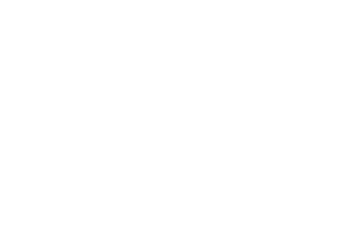

In [23]:
from sklearn import tree

tree.plot_tree(random_for_train.fit(test_features, test_lables))

    